0.6132918287537473


<IPython.core.display.Javascript object>


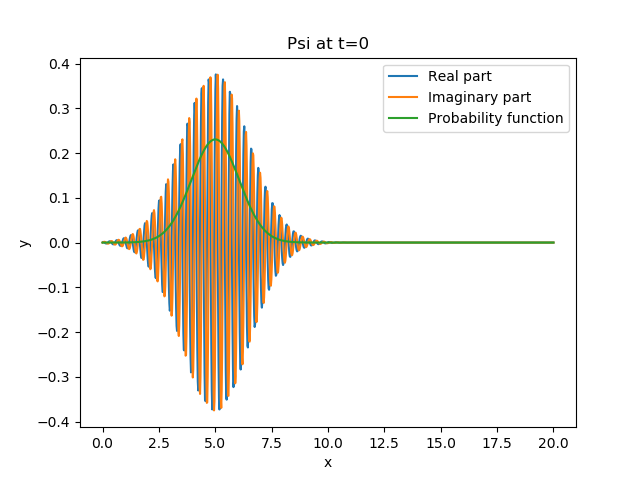

<IPython.core.display.Javascript object>


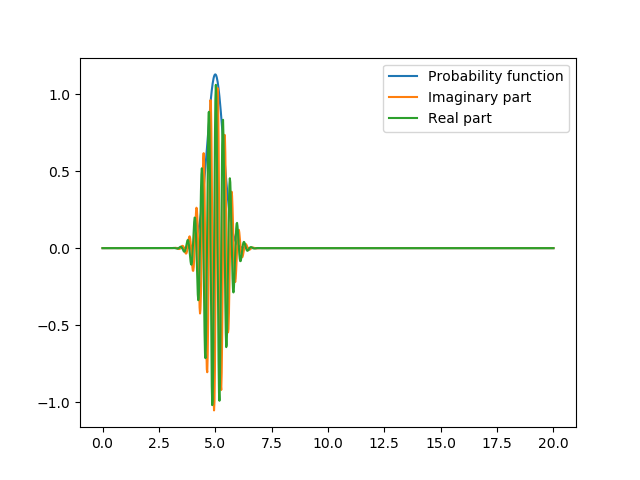

In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt

hbar=1
m=1
k_0=20
L=20
v_g=hbar*k_0/m

E=hbar**2*k_0**2/(2*m)
omega=E/hbar

#Problem 1:
#Plot psi at initial time t=0 and find the normalizing constant C for psi.

def psi_complex_0(t, x_s, sigma_x, N_x):
    dx=L/(N_x-1)
    psi=np.array(N_x*[0],dtype=np.complex64)
    probability_func=np.array(N_x*[0])
    x=np.linspace(0,L,N_x)
    psi=np.exp(-(x-x_s)**2/(2*sigma_x**2))*np.exp(1j*(k_0*x-omega*t))
    psi[0]=psi[-1]=0
    C = 1/np.sqrt((np.sum(psi.real**2)+np.sum(psi.imag**2))*dx)
    probability_func=np.exp(-(x-x_s)**2/(sigma_x**2))
#    C=(np.sum(probability_func)*dx)**(-1)
    return x, C*psi, C**2*probability_func, C


    
x_list, psi_complex, probsprobs, C=(psi_complex_0(0, 5, 1.5, 1000))
#print(probsprobs)

print(C)


plt.figure(1)
plt.plot(x_list, C*np.real(psi_complex), label="Real part")
plt.plot(x_list, C*np.imag(psi_complex), label="Imaginary part")
plt.title("Psi at t=0")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_list, C*probsprobs, label="Probability function")
plt.legend()


#Problem 2:
#Propagate the wave from x=0 to x=15, iterating through time.

def psi_complex(x_s, x_end, N_x, sigma_x, l, V_0):  
    
    dx=L/(N_x-1)
    V=np.zeros(N_x)
    V_start=int((L/2-l/2)/dx)
    V_end=int((L/2+l/2)/dx)
    V[V_start:V_end]=V_0
    T=1.1*(x_end-x_s)/v_g 
    dt = 0.03*hbar/(hbar**2/(2*m*dx**2)+max(V)) 
    N_t=int(T/dt)
    x, psi_0, prob_0, C=psi_complex_0(0, x_s, sigma_x, N_x)

 
    psi=np.zeros((N_t,N_x), dtype=np.complex64)
    psi[0]=psi_0
    prob_list=np.zeros((N_t, N_x))
    prob_list[0]=prob_0
    for t in range(N_t-1):
        psi.imag[t+1][1:-1]=psi.imag[t][1:-1]-dt*(V[1:-1]/hbar*psi.real[t][1:-1]-
            hbar/(2*m*dx**2)*(psi.real[t][:-2]-2*psi.real[t][1:-1]+psi.real[t][2:]))
            
        psi.real[t+1][1:-1]=psi.real[t][1:-1]+dt*(V[1:-1]/hbar*psi.imag[t+1][1:-1]-
            hbar/(2*m*dx**2)*(psi.imag[t+1][:-2]-2*psi.imag[t+1][1:-1]+psi.imag[t+1][2:])) 
        
        prob_list[t+1]=C**2*(psi[t+1].real**2+(psi[t+1].imag)**2)



    return x, psi, prob_list, dx, V_start, V_end, N_t

x, psi, prob, dx, V_start, V_end, N_t=psi_complex(5, 15, 1000, 0.5, L/50, 0.5*E) 

plt.figure(2)
plt.plot(x, prob[0], label="Probability function")
plt.plot(x, psi[0].imag, label="Imaginary part")
plt.plot(x, psi[0].real, label="Real part")
#plt.plot(x, prob[N_t-2], label="Probability function")
#plt.plot(x, psi[N_t-2].imag, label="Imaginary part")
#plt.plot(x, psi[N_t-2].real, label="Real part")
#plt.plot(x, V/300, label="Potential barrier")

           
plt.legend()


plt.show()